# NLP Project: Yelp Reviews

This NLP project attempts to classify Yelp reviews into 1 star or 5 star categories based off the text content in the reviews. Project uses numpy, pandas, scikitlearn, matplotlib, seaborn, vectorization, text processing with pipeline, tf-idf (term frequency-inverse document frequency), Naive Bayes, train test split, and also random forest classifier.

In [2]:
import numpy as np
import pandas as pd

In [4]:
yelp = pd.read_csv('yelp.csv')

In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [8]:
#Create a new column called "text length" which is the number of words in the text column.
yelp['text_length'] = yelp['text'].apply(len)

# EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

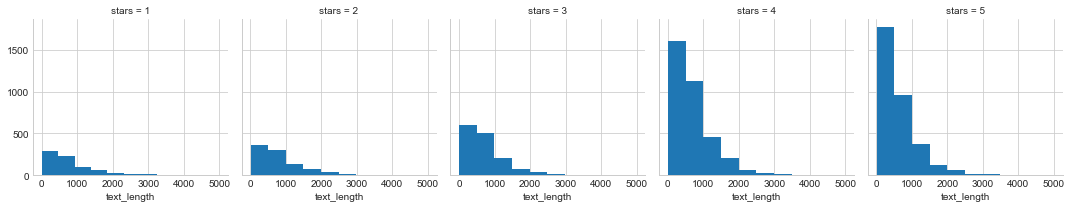

In [11]:
#Create a facet grid to create histograms based on star ratings
sns.set_style('whitegrid')
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text_length')

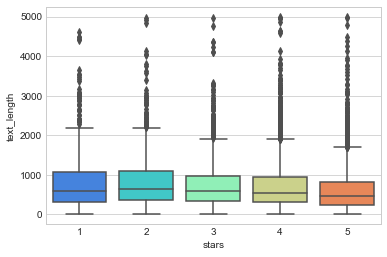

In [12]:
#Create a boxplot of text length for each star category
sns.boxplot(x='stars', y='text_length', data=yelp, palette='rainbow')

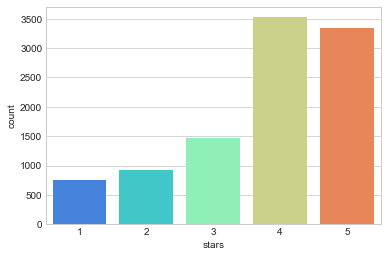

In [13]:
#Create a countplot of the number of occurrences for each type of star rating.
sns.countplot(x='stars', data=yelp, palette='rainbow')

In [14]:
#get the mean values of the numerical columns
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [15]:
#Use the corr() method on that groupby dataframe to produce this dataframe:
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


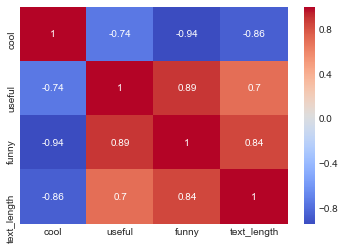

In [16]:
#create a heatmap based off that .corr() dataframe:
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)

## NLP Classification Task



In [18]:
#Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [19]:
#Create features and target/labels (X,y)
X = yelp_class['text']
y = yelp_class['stars']

In [20]:
#Import CountVectorizer and create a CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [21]:
X = cv.fit_transform(X)

In [24]:
#Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
#Train a model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [26]:
#Fit the model using the training data
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Predictions and Evaluations

In [27]:
predictions = nb.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          1       0.82      0.69      0.75       223
          5       0.93      0.97      0.95      1003

avg / total       0.91      0.92      0.91      1226



[[153  70]
 [ 33 970]]


# Using Text Processing

In [29]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [30]:
#Using the Pipeline
#Redo the train test split
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [31]:
# Fit the Pipeline to the training data. *Can't use the same data because it's already been vectorized.*
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [32]:
#Use the pipeline to predict from the X_test and create a classification report and confusion matrix.
predictions = pipeline.predict(X_test)

In [33]:
print(confusion_matrix(y_test,predictions))
('\n')
print(classification_report(y_test,predictions))
#Definitely not an improvement!

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/anneb/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
#Let's try a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [36]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [39]:
predictions = pipeline.predict(X_test)

print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
#It's an improvement over tfid, but not over the original test!

             precision    recall  f1-score   support

          1       0.82      0.35      0.49       228
          5       0.87      0.98      0.92       998

avg / total       0.86      0.86      0.84      1226



[[ 79 149]
 [ 17 981]]
